In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True)

import os
import scanpy as sc
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

In [16]:
adata = sc.read_h5ad('../datasets/CordBlood/adata_meta.h5ad')
adata

AnnData object with n_obs × n_vars = 24885 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [17]:
adata.var_names_make_unique()
adata = adata[adata.obs['GFP'] == 'GFP+', :]
adata = adata[adata.obs['Meta clones'] != '-1.0', :]
idx_mt = [not gene.startswith('MT') for gene in adata.var.index]
adata = adata[:, idx_mt]
adata

View of AnnData object with n_obs × n_vars = 11064 × 3450
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [18]:
adata_hsc = adata[adata.obs['def_lab'] == 'HSC_MPP', :]
adata_hsc.shape

(213, 3450)

In [19]:
from collections import Counter
Counter(adata_hsc.obs['def_lab'].values)

Counter({'HSC_MPP': 213})

In [20]:
adata_hsc.obs

Timepoint gfp_late   GFP     Tissue  \
SITTG7AAACGCTAGTGCGCTC      Day3           GFP+  CB_HDBI58   
SITTG7AAGGTAATCCATACAG      Day3           GFP+  CB_HDBI58   
SITTG7ACATTTCTCTGCGAGC      Day3           GFP+  CB_HDBI58   
SITTG7ACTTCCGAGGTATCTC      Day3           GFP+  CB_HDBI58   
SITTG7AGAAGTAGTCCGACGT      Day3           GFP+  CB_HDBI58   
...                          ...      ...   ...        ...   
SITTB9GCATGATTCTACGCAA     Day17      mid  GFP+  CB_HDBI58   
SITTB9GCGATCGAGGTTCACT     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTAGTCTAGTGGAAGA     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTAGGGTTCAAACCTG     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTTAGTCTCAGATGCT     Day17      mid  GFP+  CB_HDBI58   

                                          Batch  n_genes_by_counts  \
SITTG7AAACGCTAGTGCGCTC      CB_HDBI58_Day3_GFP+               5222   
SITTG7AAGGTAATCCATACAG      CB_HDBI58_Day3_GFP+               4325   
SITTG7ACATTTCTCTGCGAGC      CB_HDBI58_Day3_GFP+               4248   
SITTG7ACTTCCGAGGTATCTC      CB_HDBI58_Day3_GFP+               4542   
SITTG7AGAAGTAGTCCGACGT      CB_HDBI58_Day3_GFP+               4072   
...                                         ...                ...   
SITTB9GCATGATTCTACGCAA  CB_HDBI58_Day17_GFP+mid               1588   
SITTB9GCGATCGAGGTTCACT  CB_HDBI58_Day17_GFP+mid               1542   
SITTB9TTAGTCTAGTGGAAGA  CB_HDBI58_Day17_GFP+mid               1536   
SITTB9TTAGGGTTCAAACCTG  CB_HDBI58_Day17_GFP+mid               1435   
SITTB9TTTAGTCTCAGATGCT  CB_HDBI58_Day17_GFP+mid               1442   

                        total_counts  total_counts_mt  pct_counts_mt  \
SITTG7AAACGCTAGTGCGCTC       27139.0           1573.0       5.796087   
SITTG7AAGGTAATCCATACAG       17947.0           1011.0       5.633254   
SITTG7ACATTTCTCTGCGAGC       16371.0            645.0       3.939894   
SITTG7ACTTCCGAGGTATCTC       19875.0           1155.0       5.811321   
SITTG7AGAAGTAGTCCGACGT       16473.0            586.0       3.557336   
...                              ...              ...            ...   
SITTB9GCATGATTCTACGCAA        5599.0             30.0       0.535810   
SITTB9GCGATCGAGGTTCACT        5235.0              5.0       0.095511   
SITTB9TTAGTCTAGTGGAAGA        4995.0             90.0       1.801802   
SITTB9TTAGGGTTCAAACCTG        4177.0             14.0       0.335169   
SITTB9TTTAGTCTCAGATGCT        4937.0             32.0       0.648167   

                         S_score  ...  label_red      clones time_label_full  \
SITTG7AAACGCTAGTGCGCTC  0.175385  ...    HSC_MPP  Clone_3869    Day3_HSC_MPP   
SITTG7AAGGTAATCCATACAG -0.077368  ...    HSC_MPP  Clone_1456    Day3_HSC_MPP   
SITTG7ACATTTCTCTGCGAGC -0.171314  ...    HSC_MPP  Clone_1155    Day3_HSC_MPP   
SITTG7ACTTCCGAGGTATCTC -0.113979  ...    HSC_MPP  Clone_2975    Day3_HSC_MPP   
SITTG7AGAAGTAGTCCGACGT  0.202693  ...    HSC_MPP   Clone_189    Day3_HSC_MPP   
...                          ...  ...        ...         ...             ...   
SITTB9GCATGATTCTACGCAA -0.447354  ...         DC  Clone_2691   Day17_HSC_MPP   
SITTB9GCGATCGAGGTTCACT -0.367956  ...         DC   Clone_189   Day17_HSC_MPP   
SITTB9TTAGTCTAGTGGAAGA -0.356109  ...         DC  Clone_1280   Day17_HSC_MPP   
SITTB9TTAGGGTTCAAACCTG -0.315366  ...   Monocyte   Clone_429   Day17_HSC_MPP   
SITTB9TTTAGTCTCAGATGCT -0.279546  ...         DC  Clone_2060   Day17_HSC_MPP   

                        time_label_red Meta clones leiden  \
SITTG7AAACGCTAGTGCGCTC    Day3_HSC_MPP           7     18   
SITTG7AAGGTAATCCATACAG    Day3_HSC_MPP           3     18   
SITTG7ACATTTCTCTGCGAGC    Day3_HSC_MPP           8     18   
SITTG7ACTTCCGAGGTATCTC    Day3_HSC_MPP           6      7   
SITTG7AGAAGTAGTCCGACGT    Day3_HSC_MPP           3     23   
...                                ...         ...    ...   
SITTB9GCATGATTCTACGCAA        Day17_DC           3     23   
SITTB9GCGATCGAGGTTCACT        Day17_DC           3     23   
SITTB9TTAGTCTAGTGGAAGA        Day17_DC          12     23   
S

In [21]:
for i in range(14):
    print (f'Meta-Clone {i}:', np.sum(adata_hsc.obs['Meta clones'].values == str(i)))

Meta-Clone 0: 0
Meta-Clone 1: 0
Meta-Clone 2: 24
Meta-Clone 3: 124
Meta-Clone 4: 3
Meta-Clone 5: 3
Meta-Clone 6: 7
Meta-Clone 7: 8
Meta-Clone 8: 41
Meta-Clone 9: 0
Meta-Clone 10: 0
Meta-Clone 11: 0
Meta-Clone 12: 3
Meta-Clone 13: 0


/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


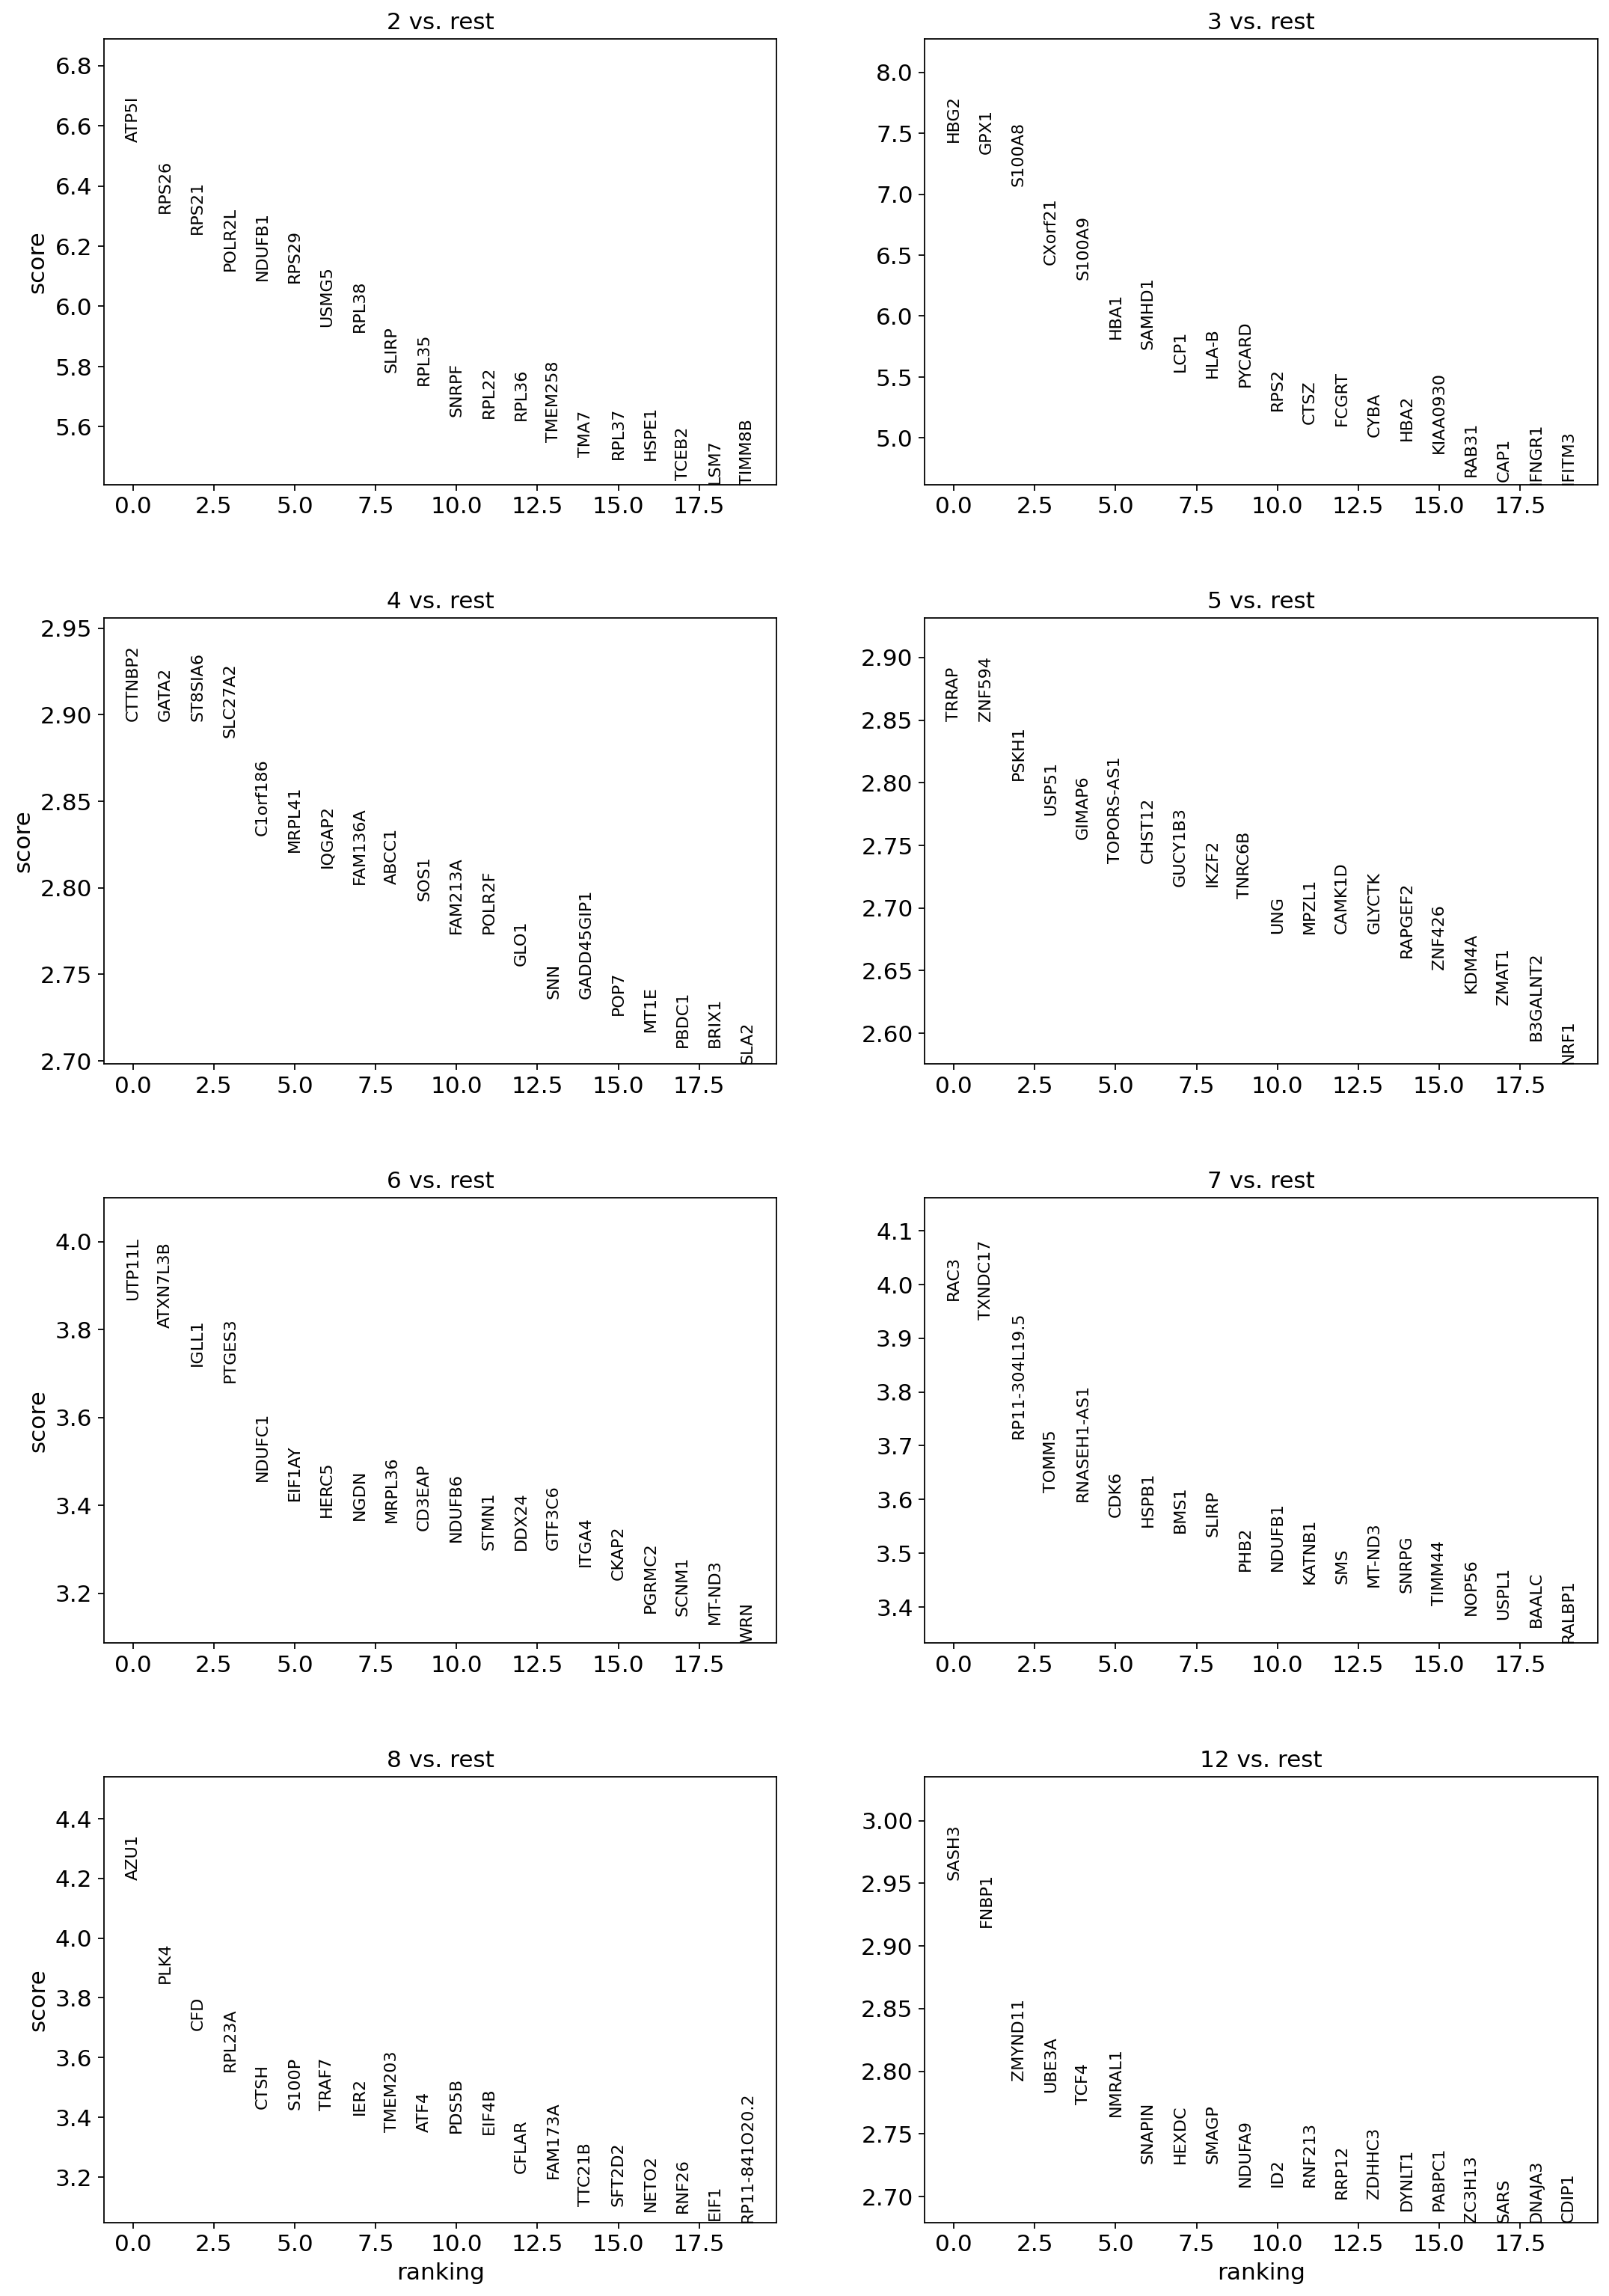

In [23]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
plt.rcParams['axes.grid'] = False
sc.tl.rank_genes_groups(adata_hsc, 'Meta clones', method='wilcoxon')
sc.pl.rank_genes_groups(adata_hsc, sharey=False, ncols=2, fontsize=10)

In [26]:
df = pd.DataFrame(adata_hsc.uns['rank_genes_groups']['names'])
df.head(10)

2        3         4           5         6              7        8  \
0   ATP5I     HBG2   CTTNBP2       TRRAP    UTP11L           RAC3     AZU1   
1   RPS26     GPX1     GATA2      ZNF594  ATXN7L3B        TXNDC17     PLK4   
2   RPS21   S100A8   ST8SIA6       PSKH1     IGLL1  RP11-304L19.5      CFD   
3  POLR2L  CXorf21   SLC27A2       USP51    PTGES3          TOMM5   RPL23A   
4  NDUFB1   S100A9  C1orf186      GIMAP6    NDUFC1    RNASEH1-AS1     CTSH   
5   RPS29     HBA1    MRPL41  TOPORS-AS1    EIF1AY           CDK6    S100P   
6   USMG5   SAMHD1    IQGAP2      CHST12     HERC5          HSPB1    TRAF7   
7   RPL38     LCP1   FAM136A     GUCY1B3      NGDN           BMS1     IER2   
8   SLIRP    HLA-B     ABCC1       IKZF2    MRPL36          SLIRP  TMEM203   
9   RPL35   PYCARD      SOS1      TNRC6B    CD3EAP           PHB2     ATF4   

        12  
0    SASH3  
1    FNBP1  
2  ZMYND11  
3    UBE3A  
4     TCF4  
5   NMRAL1  
6   SNAPIN  
7    HEXDC  
8    SMAGP  
9   NDUFA9

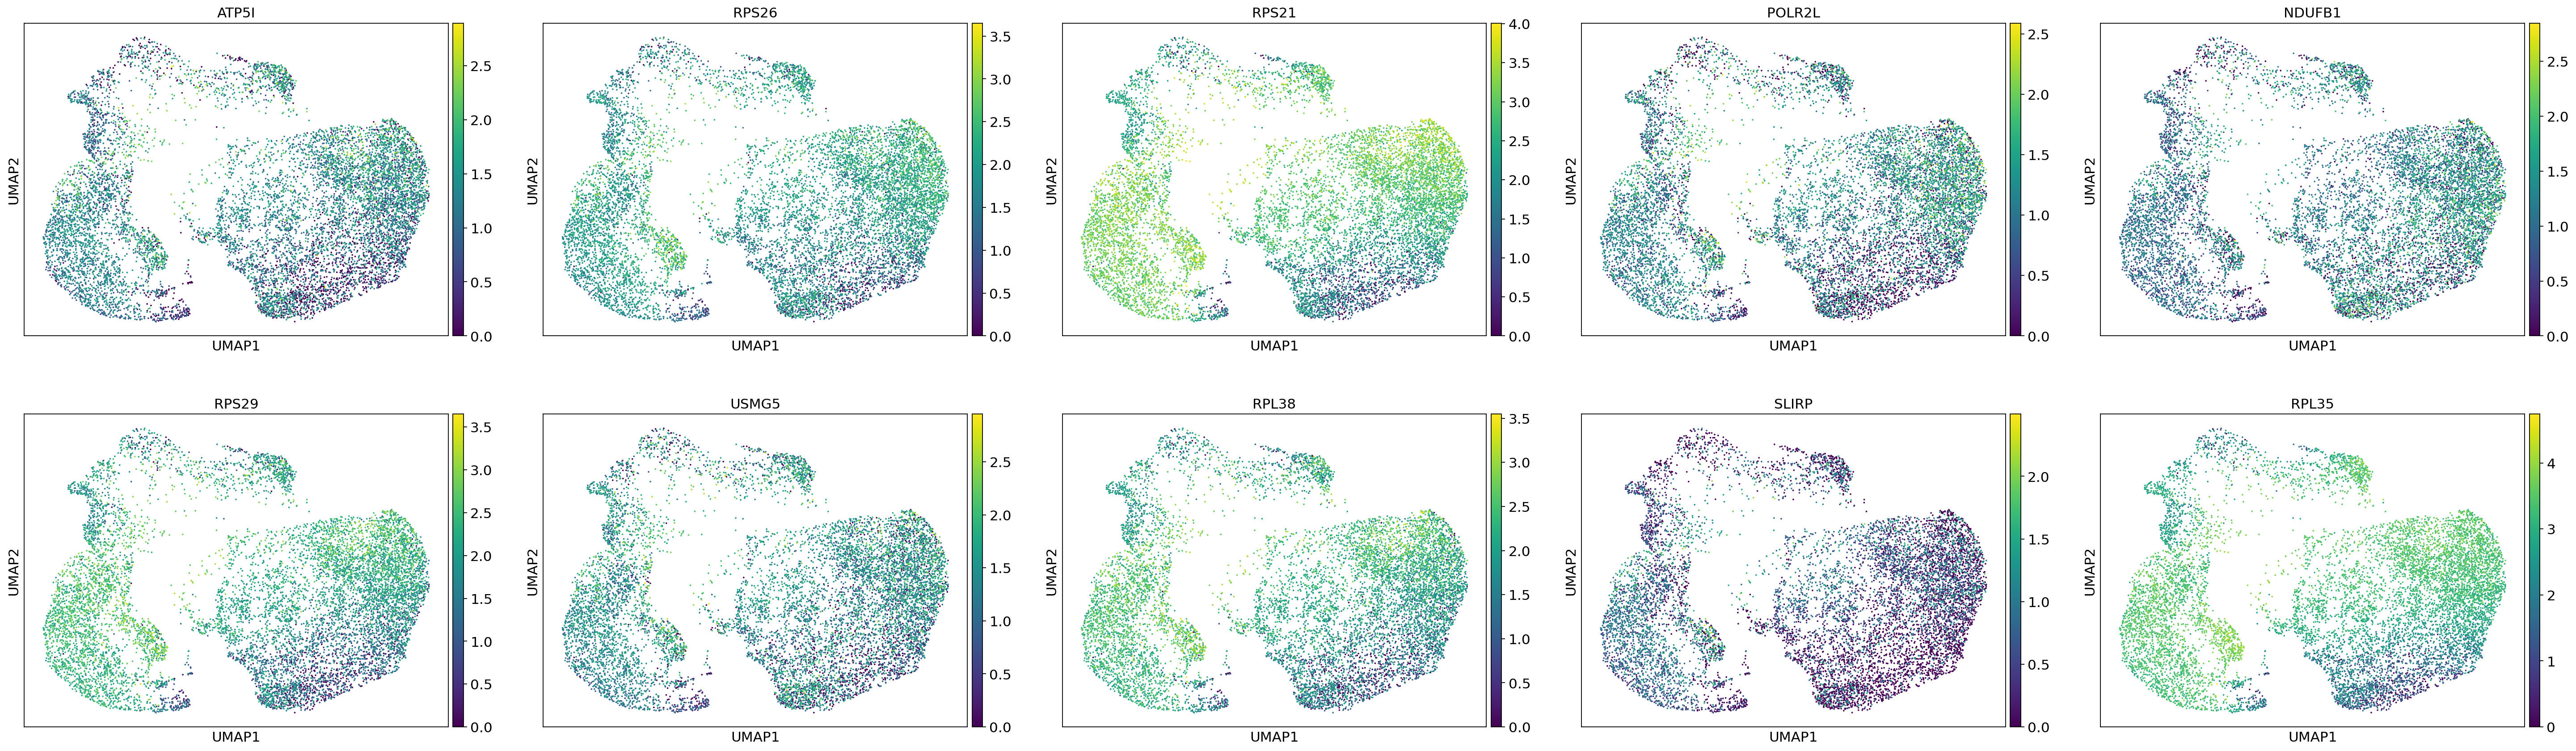

In [32]:
sc.set_figure_params(dpi_save=300, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=df['2'].head(10).values.flatten(), ncols=5)

In [12]:
test = adata_day3_hsc[adata_day3_hsc.obs['Meta clones'].values == str(2), :]
refe = adata_day3_hsc[adata_day3_hsc.obs['Meta clones'].values != str(2), :]

/tmp/ipykernel_188354/4198120552.py:9: RuntimeWarning: invalid value encountered in log2
  lfc = np.log2(fold_change)


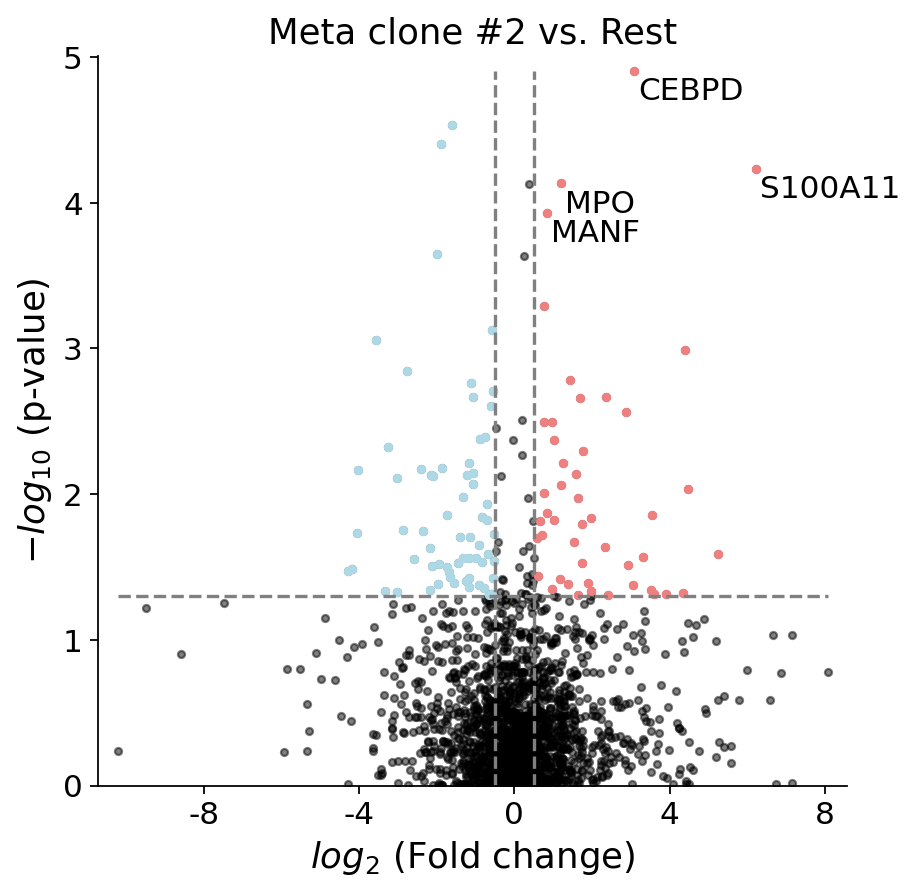

In [79]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mean_test = np.mean(np.exp(test.X) - 1, axis=0)
mean_refe = np.mean(np.exp(refe.X) - 1, axis=0)

fold_change = mean_test / mean_refe
lfc = np.log2(fold_change)

t_statistic, p_values = stats.mannwhitneyu(test.X, refe.X)
neg_log_10 = -np.log10(p_values)
threshold = 0.05

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.hlines(y=-np.log10(0.05), linestyles='dashed', xmin=np.nanmin(lfc), xmax=np.nanmax(lfc), color='grey')
plt.scatter(lfc, neg_log_10, color='black', alpha=0.5, s=10)
plt.xlim([np.nanmin(lfc) - 0.5, np.nanmax(lfc) + 0.5])
plt.ylim([0, np.nanmax(neg_log_10) + 0.1])
plt.xticks([-8, -4, 0, 4, 8], [-8, -4, 0 ,4, 8], fontsize=14)
plt.yticks(fontsize=14)

plt.vlines(x=-0.5, linestyles='dashed', ymin=0, ymax=np.nanmax(neg_log_10), color='grey')
plt.vlines(x=0.5, linestyles='dashed', ymin=0, ymax=np.nanmax(neg_log_10), color='grey')
plt.scatter(lfc[np.bitwise_and(lfc > 0.5, p_values < threshold)], neg_log_10[np.bitwise_and(lfc > 0.5, p_values < threshold)], color='lightcoral', s=10)
plt.scatter(lfc[np.bitwise_and(lfc < -0.5, p_values < threshold)], neg_log_10[np.bitwise_and(lfc < -0.5, p_values < threshold)], color='lightblue', s=10)

index = [2294, 70, 1017, 1710]
names = ['CEBPD', 'S100A11', 'MPO', 'MANF']
for i in range(len(index)):
    plt.text(lfc[index[i]] + 0.1, neg_log_10[index[i]] - 0.2, names[i])

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

plt.xlabel('$log_{2}$ (Fold change)', fontsize=16)
plt.ylabel('$-log_{10}$ (p-value)', fontsize=16)
plt.title('Meta clone #2 vs. Rest', fontsize=16)
plt.savefig(f'./volcano_meta2.svg', dpi=600, bbox_inches='tight', transparent=False, facecolor='white')

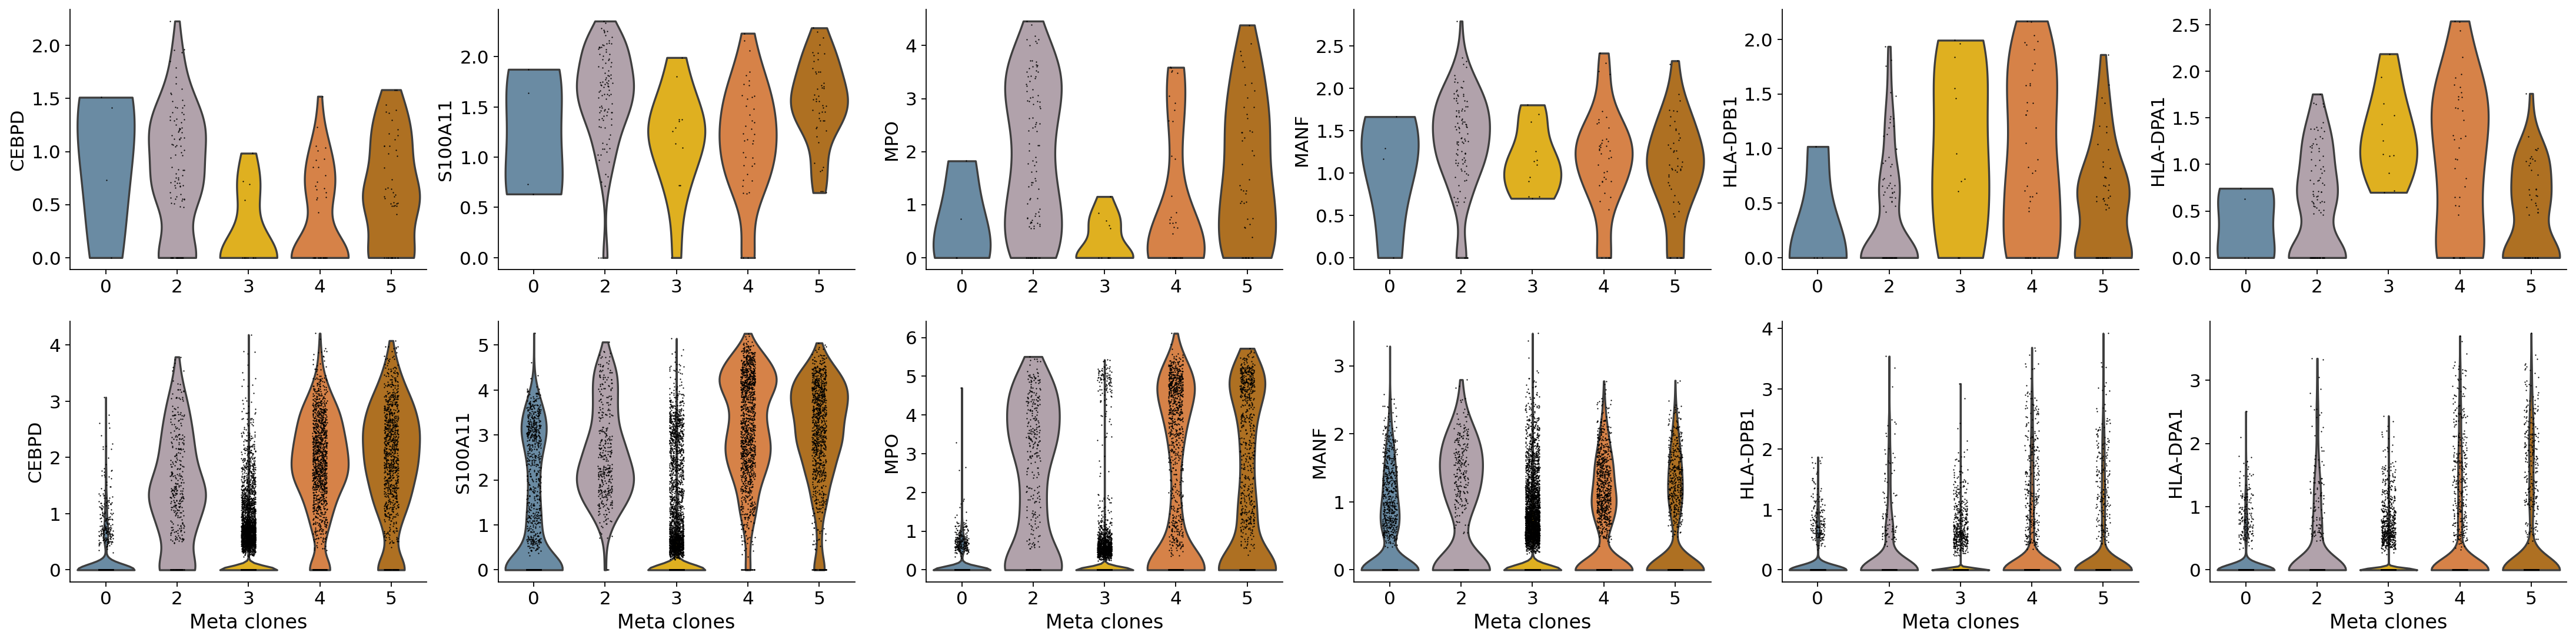

In [83]:
fig, axes = plt.subplots(2, 6, figsize=(34, 8))
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
temp = adata[adata.obs.index[adata.obs['Meta clones'] != '1'], :]
color = ['#618CAC', '#B39FAB', '#FFC000', '#ED7D31', '#C5720B', '#B29E79']

for idx, gene in enumerate(['CEBPD', 'S100A11', 'MPO', 'MANF', 'HLA-DPB1', 'HLA-DPA1']):
    sc.pl.violin(adata_day3_hsc, gene, groupby='Meta clones', ax=axes[0][idx], show=False, palette=color)
    axes[0][idx].set_xlabel('')
    axes[0][idx].yaxis.grid(False)
    axes[0][idx].spines['top'].set_visible(False)
    axes[0][idx].spines['right'].set_visible(False)
for idx, gene in enumerate(['CEBPD', 'S100A11', 'MPO', 'MANF', 'HLA-DPB1', 'HLA-DPA1']):
    sc.pl.violin(temp, gene, groupby='Meta clones', ax=axes[1][idx], show=False, palette=color)
    axes[1][idx].set_xlabel('Meta clones', fontsize=16)
    axes[1][idx].yaxis.grid(False)
    axes[1][idx].spines['top'].set_visible(False)
    axes[1][idx].spines['right'].set_visible(False)

# plt.show()
plt.savefig(f'./hsc_degs.svg', dpi=600, bbox_inches='tight', transparent=False, facecolor='white')

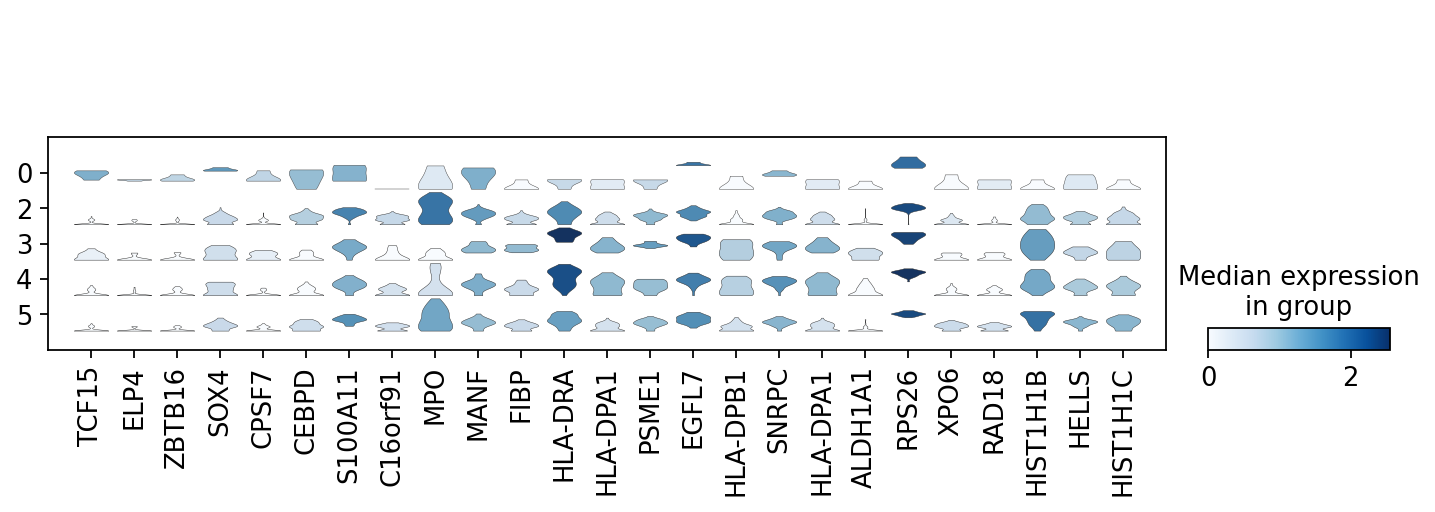

In [11]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
sc.pl.stacked_violin(adata_day3_hsc, df.head(5).T.values.flatten(), groupby='Meta clones', save=True)